# **Data Analysis Part 3**

## Objectives

Construct additional plots to understand relationships between the categorical variables of the dataset, so as to gain a better understanding of the data

## Inputs

outputs/datasets/collection/student-exam-results.csv

## Outputs
- Plots
- Better understanding of the dataset's patterns and relationships
- Validate hypotheses

## Additional comments

# Change working directory

Since this notebook exists in the jupyter_notebooks directory, we need to change the current working directory from the jupyter_notebooks directory to the workspace, so that any directories created in further codes cells are added in the correct place. 

We access the current directory with the OS packages' `getcwd()` method

In [1]:
import os
current_directory = os.getcwd()
current_directory


'/workspace/Exam-Scores-Analysis/jupyter_notebooks'

We now want to set the working directory as the parent of the current working directory, jupyter_notebooks

- The `os.path.dirname()` method gets the parent directory
- The `os.chir()` method defines the new current directory
- We do this to access all of the project's files and directories, rather than those in the jupyter_notebooks directory

In [2]:
os.chdir(os.path.dirname(current_directory))
print("You set a new current directory")

You set a new current directory


To make certain of things, we now use a code cell to confirm that we have set the current working directory properly

In [3]:
current_directory = os.getcwd()
current_directory

'/workspace/Exam-Scores-Analysis'

Import plotting packages

In [4]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pingouin as pg
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Load Data

In [5]:
df = pd.read_csv('outputs/datasets/collection/student-exam-results.csv')
df.head()

,gender,ethnicity,parental_education,lunch_program,test_preparation_course,math_score,reading_score,writing_score,average_score,literacy_score
0,male,group A,high school,standard,completed,67,67,63,65,65
1,female,group D,some high school,free/reduced,none,40,59,55,51,57
2,male,group E,some college,free/reduced,none,59,60,50,56,55
3,male,group B,high school,standard,none,77,78,68,74,73
4,male,group E,associate's degree,standard,completed,78,73,68,73,70


# Outline

Now that we have determined the factors that influence the exam scores, we can now begin to validate our higher-level hypotheses - those that hypothesize that the categorical variables of the dataset are not independent, and that relationships do exist within them.

These higher-level hypotheses are:

- that increased levels of parental education correlate with increased participation in the test preparation program
- that increased levels of parental education negatively correlate to their children's participation in the free/reduced school lunch program
- that a student's ethnicity has an effect on their parent's educational level
- that a student's ethnicity has an effect on their participation in the free/reduced school lunch program
- that a student's ethnicity has an effect on their participation in the test preparation course

To do this, we will need to encode our categorical variable columns with numerical values. We can do this with the `replace()` method and Python dictionaries.


# Preparation

Firstly, we will instantiate a copy of the dataframe with which to work.

In [6]:
df_categorical_analysis = df.copy()
df_categorical_analysis.head()

,gender,ethnicity,parental_education,lunch_program,test_preparation_course,math_score,reading_score,writing_score,average_score,literacy_score
0,male,group A,high school,standard,completed,67,67,63,65,65
1,female,group D,some high school,free/reduced,none,40,59,55,51,57
2,male,group E,some college,free/reduced,none,59,60,50,56,55
3,male,group B,high school,standard,none,77,78,68,74,73
4,male,group E,associate's degree,standard,completed,78,73,68,73,70


Now we can define the dictionaries with the numbers with which we will replace the categorical values.

In [7]:
gender_dictionary = {
    'male': 1,
    'female': 2
}

ethnicity_dictionary = {
    'group A': 1,
    'group B': 2,
    'group C': 3,
    'group D': 4,
    'group E': 5
}

parental_education_dictionary = {
    'some high school': 1,
    'high school': 2,
    'some college': 3,
    "associate's degree": 4,
    "bachelor's degree": 5,
    "master's degree": 6
}

lunch_program_dictionary = {
    'standard': 1,
    'free/reduced': 2
}

test_prep_course_dictionary = {
    'completed': 1,
    'none': 2
}

Now we can replace the categorical values. We will do this in stages, checking that each column's values have been replaced. First, gender:

In [8]:
df_categorical_analysis['gender'].replace(to_replace=gender_dictionary, inplace=True)
df_categorical_analysis.head()

,gender,ethnicity,parental_education,lunch_program,test_preparation_course,math_score,reading_score,writing_score,average_score,literacy_score
0,1,group A,high school,standard,completed,67,67,63,65,65
1,2,group D,some high school,free/reduced,none,40,59,55,51,57
2,1,group E,some college,free/reduced,none,59,60,50,56,55
3,1,group B,high school,standard,none,77,78,68,74,73
4,1,group E,associate's degree,standard,completed,78,73,68,73,70


Now, ethnicity:

In [9]:
df_categorical_analysis['ethnicity'].replace(to_replace=ethnicity_dictionary, inplace=True)
df_categorical_analysis.head()

,gender,ethnicity,parental_education,lunch_program,test_preparation_course,math_score,reading_score,writing_score,average_score,literacy_score
0,1,1,high school,standard,completed,67,67,63,65,65
1,2,4,some high school,free/reduced,none,40,59,55,51,57
2,1,5,some college,free/reduced,none,59,60,50,56,55
3,1,2,high school,standard,none,77,78,68,74,73
4,1,5,associate's degree,standard,completed,78,73,68,73,70


Now parental_education:

In [10]:
df_categorical_analysis['parental_education'].replace(to_replace=parental_education_dictionary, inplace=True)
df_categorical_analysis.head()

,gender,ethnicity,parental_education,lunch_program,test_preparation_course,math_score,reading_score,writing_score,average_score,literacy_score
0,1,1,2,standard,completed,67,67,63,65,65
1,2,4,1,free/reduced,none,40,59,55,51,57
2,1,5,3,free/reduced,none,59,60,50,56,55
3,1,2,2,standard,none,77,78,68,74,73
4,1,5,4,standard,completed,78,73,68,73,70


Now lunch_program:

In [11]:
df_categorical_analysis['lunch_program'].replace(to_replace=lunch_program_dictionary, inplace=True)
df_categorical_analysis.head()

,gender,ethnicity,parental_education,lunch_program,test_preparation_course,math_score,reading_score,writing_score,average_score,literacy_score
0,1,1,2,1,completed,67,67,63,65,65
1,2,4,1,2,none,40,59,55,51,57
2,1,5,3,2,none,59,60,50,56,55
3,1,2,2,1,none,77,78,68,74,73
4,1,5,4,1,completed,78,73,68,73,70


And finally test_preparation_course:

In [12]:
df_categorical_analysis['test_preparation_course'].replace(to_replace=test_prep_course_dictionary, inplace=True)
df_categorical_analysis.head()

,gender,ethnicity,parental_education,lunch_program,test_preparation_course,math_score,reading_score,writing_score,average_score,literacy_score
0,1,1,2,1,1,67,67,63,65,65
1,2,4,1,2,2,40,59,55,51,57
2,1,5,3,2,2,59,60,50,56,55
3,1,2,2,1,2,77,78,68,74,73
4,1,5,4,1,1,78,73,68,73,70


To simplify matters, and because we are only considering the (formerly) categorical variables, we can safely drop the student test scores

In [13]:
df_categorical_analysis.drop(labels=['math_score', 'reading_score', 'writing_score', 'average_score', 'literacy_score'], axis=1, inplace=True)
df_categorical_analysis.head()

,gender,ethnicity,parental_education,lunch_program,test_preparation_course
0,1,1,2,1,1
1,2,4,1,2,2
2,1,5,3,2,2
3,1,2,2,1,2
4,1,5,4,1,1


Since we are looking to determine if there are any extant relationships in the dataset's categorical variables, it seems that I might be best served looking at correlations. Let's generate a correlation table, and then visualise it with a heatmap:

In [14]:
df_categorical_analysis_correlation = df_categorical_analysis.corr(method='pearson')
df_categorical_analysis_correlation

,gender,ethnicity,parental_education,lunch_program,test_preparation_course
gender,1.000000,-0.063231,-0.016830,-0.033962,0.007653
ethnicity,-0.063231,1.000000,-0.057522,0.033335,0.029828
parental_education,-0.016830,-0.057522,1.000000,-0.016037,-0.013075
lunch_program,-0.033962,0.033335,-0.016037,1.000000,0.029267
test_preparation_course,0.007653,0.029828,-0.013075,0.029267,1.000000


/tmp/ipykernel_4646/3952672062.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_categorical_analysis_correlation, dtype=np.bool)


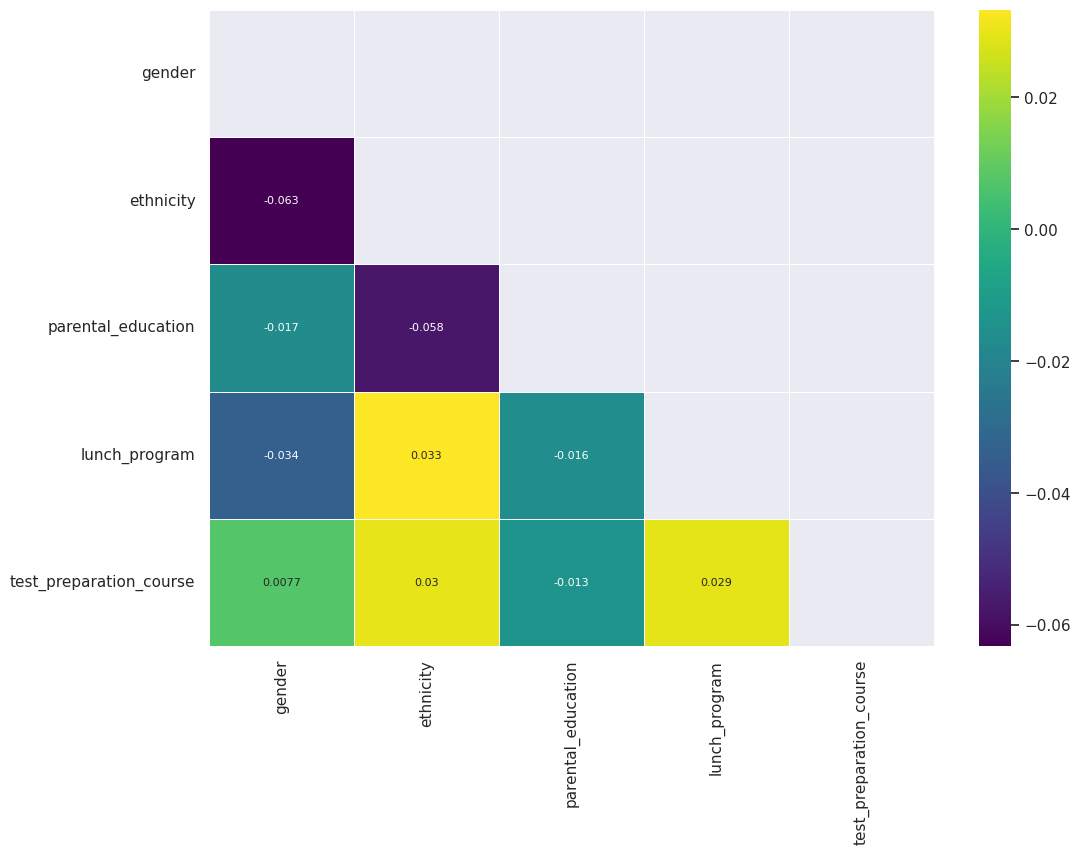

In [15]:
mask = np.zeros_like(df_categorical_analysis_correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_categorical_analysis_correlation,annot=True,mask=mask,cmap='viridis',annot_kws={"size": 8},linewidths=0.5)
plt.ylim(df_categorical_analysis_correlation.shape[1],0)
plt.show()

It seems that the correlation method has failed to reveal any significant relationships - we see that the correlation table and the heatmap shows very weak correlations. This may mean that the categorical variables are truly independent, and that none of them has any meaningful influence on the others. However, we should investigate further before we can say this for sure. It may just be that the correlation analysis cannot extract meaningful relationships from numerical values over a small range.

My alternative approach here will be to examine each hypothesized relationship individually, in hopes that a more targetted study will reveal insights.

## Parental education - test prep course

We will now validate the hypothesis that increased parental education correlates with increased student participation in the test preparation course. To do this, we will cut down the encoded dataframe to just the `parental_education` and `test_preparation_course` columns

In [16]:
df_categorical_analysis_1 = df_categorical_analysis.filter(['parental_education', 'test_preparation_course'])
df_categorical_analysis_1.head()

,parental_education,test_preparation_course
0,2,1
1,1,2
2,3,2
3,2,2
4,4,1


Now we can begin to identify relationships. We want to see how many counts of each `parental_education` category there are for each of the 2 values of `test_preparation_course`. To do this, we can use the `query()` method to produce 2 dataframes, one for each value of `test_preparation_course`.

In [17]:
df_categorical_analysis_1_1 = df_categorical_analysis_1.query('test_preparation_course == 1')
df_categorical_analysis_1_1.head()
# For reference - test_preparation_course category of 1 means the student has completed the test preparation course

,parental_education,test_preparation_course
0,2,1
4,4,1
7,3,1
10,3,1
11,2,1


In [18]:
df_categorical_analysis_1_2 = df_categorical_analysis_1.query('test_preparation_course == 2')
df_categorical_analysis_1_2.head()
# For reference - test_preparation_course category of 2 means the student has NOT completed the test preparation course

,parental_education,test_preparation_course
1,1,2
2,3,2
3,2,2
5,2,2
6,5,2


We can now use the `value_counts()` method to return the number of unique values of `parental_education`

In [19]:
df_categorical_analysis_1_1['parental_education'].value_counts()

3    82
4    75
1    63
2    57
5    39
6    19
Name: parental_education, dtype: int64

In [20]:
df_categorical_analysis_1_2['parental_education'].value_counts()

2    145
3    140
1    128
4    128
5     73
6     51
Name: parental_education, dtype: int64

These 2 Series are not overly useful - If we return to the notebook 02-DataAnalysis1, and examine the Pandas Profile Report, we remind ourselves that the test_preparation_course column contains approximately twice as many entries for `none` and for `completed` - 665 vs 335. Therefore, we should expect `df_categorical_analysis_1_2` to contain more value counts for each category of the `parental_education` column. To solve this, we can normalize the value counts. To make the 2 series such that they can be interpreted easily, we will sort them by the `parental_education` column's values, using those values as an index.

In [21]:
df_categorical_analysis_1_1_VC = df_categorical_analysis_1_1['parental_education'].value_counts(normalize=True).sort_index()
df_categorical_analysis_1_1_VC
# test preparation course completed

1    0.188060
2    0.170149
3    0.244776
4    0.223881
5    0.116418
6    0.056716
Name: parental_education, dtype: float64

In [22]:
df_categorical_analysis_1_2['parental_education'].value_counts(normalize=True).sort_index()
# test preparation course NOT completed

1    0.192481
2    0.218045
3    0.210526
4    0.192481
5    0.109774
6    0.076692
Name: parental_education, dtype: float64

We can now construct barplots to visualise this information

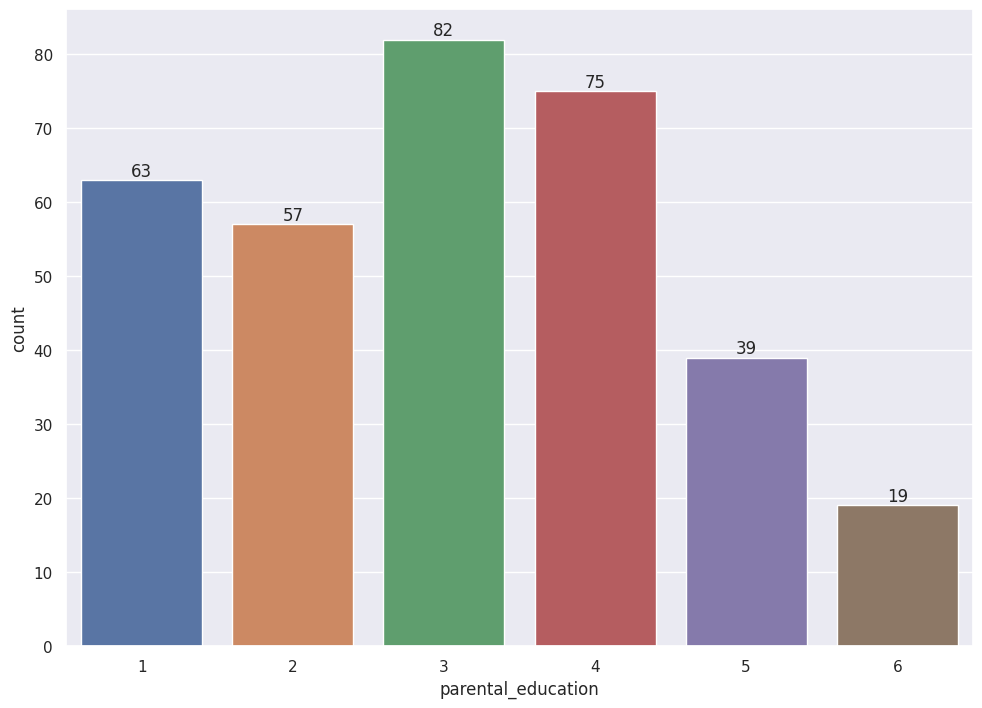

In [23]:
parental_education_test_prep_course_1 = sns.countplot(data=df_categorical_analysis_1_1, x='parental_education')
plt.bar_label(parental_education_test_prep_course_1.containers[0])
plt.show()

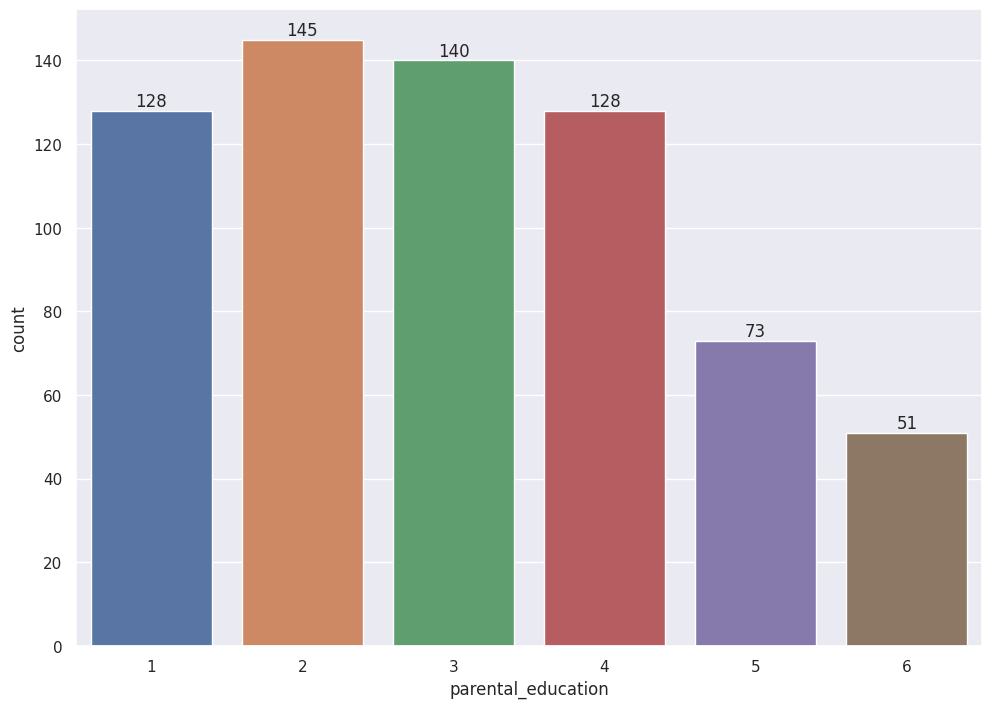

In [24]:
parental_education_test_prep_course_2 = sns.countplot(data=df_categorical_analysis_1_2, x='parental_education')
plt.bar_label(parental_education_test_prep_course_2.containers[0])
plt.show()

These barplots are somewhat more useful, however we have the same problem as with the un-normalised output of the `value_counts()` method - we cannot compare the 2 plots in relative terms

<AxesSubplot: xlabel='parental_education', ylabel='Percent'>

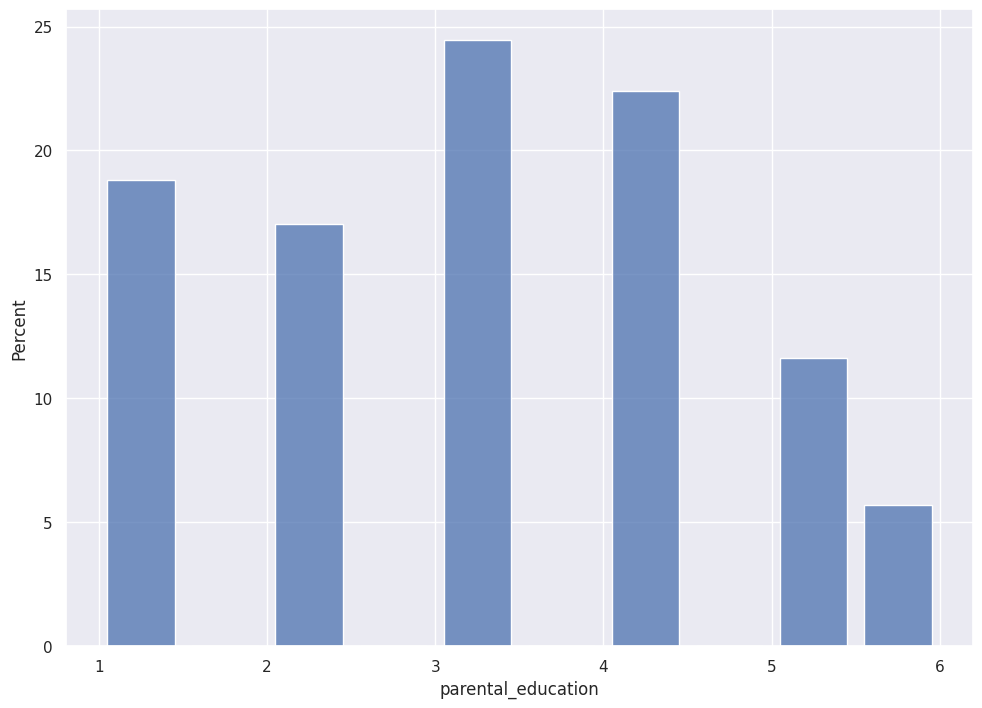

In [26]:
sns.histplot(x = df_categorical_analysis_1_1['parental_education'], multiple="dodge", stat = 'percent', shrink = 0.8, common_norm=False)

<AxesSubplot: xlabel='parental_education', ylabel='Percent'>

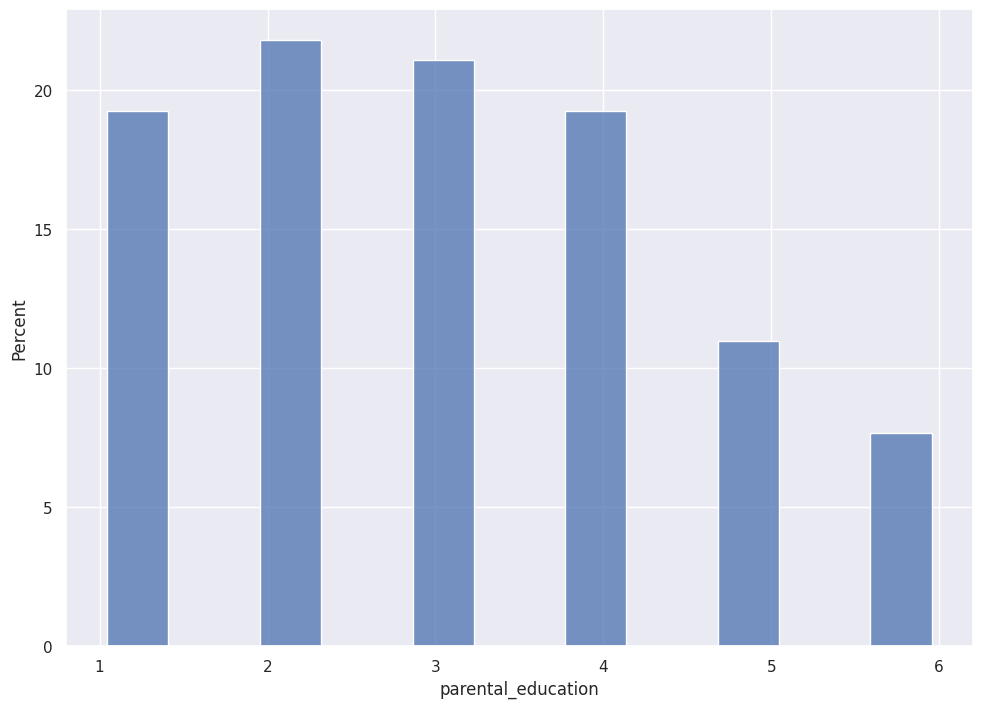

In [25]:
sns.histplot(x = df_categorical_analysis_1_2['parental_education'], multiple="dodge", stat = 'percent', shrink = 0.8, common_norm=False)